In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.image as mpimg
from scipy.optimize import curve_fit
import cmath
import warnings
warnings.filterwarnings("ignore")
np.float_ = np.float128

In [78]:
lambda0 = -1
def wavelength_to_rgb(wavelength, gamma=0.8):
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255 
    return "#{0:02x}{1:02x}{2:02x}".format(int(R), int(G), int(B)) 

def reformat_file(z):
    file = []
    with open(z) as f:
        for i in f:
            text = f.readline()
            text = text.split(";")
            file.append(text)
    file = np.asarray(file)
    file = file[4:]
    for i in range(len(file)-1):
        file[i][0] = float(file[i][0].replace(',','.'))
        file[i][1] = float(file[i][1].replace(',','.'))
        file[i][2] = float(file[i][2].replace(',','.'))
        file[i][3] = float(file[i][3].replace(',','.'))
        file[i][4] = float(file[i][4].replace(',','.').replace('\n',''))
    out = z.replace('.','') + 'rfd.txt'
    with open(out, 'w') as f:
         for i in range(len(file)-1):
            print(*file[i], file=f)
            
def T(lambdax, delta, n, L):
    global lambda0
    c = 3e8
    lambdar = lambda0 * 1e-9
    lambdax = lambdax * 1e-9
    omega = 2 * np.pi * c / lambdax
    tau = 4 * np.pi * n / lambdar
    cappa = omega * n / c
    beta = cappa**2 * (1 + (tau/(2 * cappa))**2 - np.sqrt((tau/cappa)**2 + delta**2))
    Tr = (4 * (beta / (cappa)**2)) / (4 * (beta / (cappa)**2)+ delta**2\
          * np.sign(beta) * np.abs(np.sin(np.sqrt(beta * L, dtype=np.complex256)))**2)
    return (Tr+0.85)/2
def T1(lambdax, delta, n, L):
    global lambda0
    c = 3e8
    lambdar = lambda0 * 1e-9
    lambdax = lambdax * 1e-9
    omega = 2 * np.pi * c / lambdax
    tau = 4 * np.pi * n / lambdar
    cappa = omega * n / c
    beta = cappa**2 * (1 + (tau/(2 * cappa))**2 - np.sqrt((tau/cappa)**2 + delta**2))
    Tr = (4 * (beta / (cappa)**2)) / (4 * (beta / (cappa)**2)+ delta**2\
          * np.sign(beta) * np.abs(np.sin(np.sqrt(beta * L, dtype=np.complex256)))**2)
    return (Tr+0.95)/2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


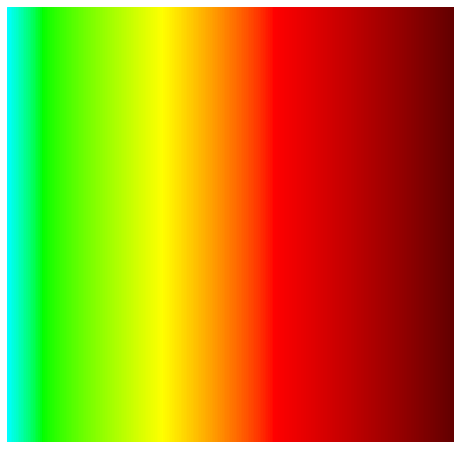

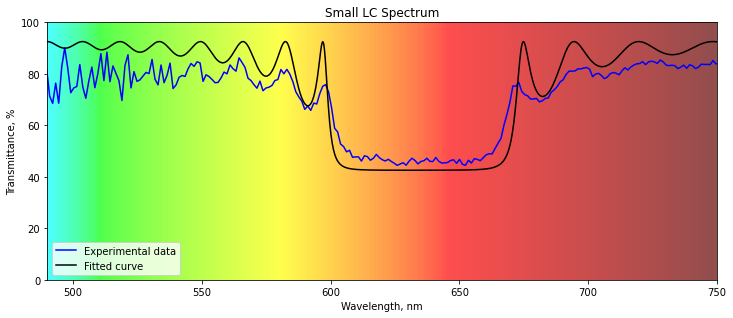

δ = 0.10500000000000001 
n = 1.5 
L = 5.0000005e-06


In [70]:
#SMALL
reformat_file('SMALL2_1803151U1.TXT')
data = np.genfromtxt('SMALL2_1803151U1TXTrfd.txt')
data = data[240:500] #Desired spectrum
xl = (490, 750)
yl = (0, 100)
#Background
fig, ax = plt.subplots(figsize=(8,8))
plt.xlim(xl)
plt.ylim(yl)
for i in range(*xl):
    rect = patches.Rectangle((i, 0), 1, yl[1], color=wavelength_to_rgb(i))
    ax.add_patch(rect)
ax.set_axis_off()
plt.savefig("background.png", bbox_inches='tight', pad_inches=0)
#Actual plot
fig, ax = plt.subplots(figsize=(12, 8))
img = mpimg.imread("background.png")
plt.xlim(xl)
plt.ylim(yl)
ax.imshow(img, zorder=1, alpha = 0.7, extent=[*xl, *yl])

ax.plot(data[:, 0], data[:, 4], color="blue", label="Experimental data")

lambda0 = data[data[:, 4].argmin(), 0]
popt, _ = curve_fit(T, data[:, 0], data[:, 4]/100, maxfev=20000, bounds=([0.04, 1.4, 1e-12], [0.17, 1.6, 1e-5]))
x = np.linspace(400, 800, 1600)

ax.plot(x, T(x - 10, 0.1, 1.55, 3e-11)*100, color="black", label="Fitted curve")
ax.set_title("Small LC Spectrum")
ax.set_xlabel("Wavelength, nm")
ax.set_ylabel("Transmittance, %")
ax.legend()
plt.savefig("SmallLC.eps")
plt.show()
print("\u03B4 =", popt[0], "\n"
      "n =", popt[1], "\n"
      "L =", popt[2])

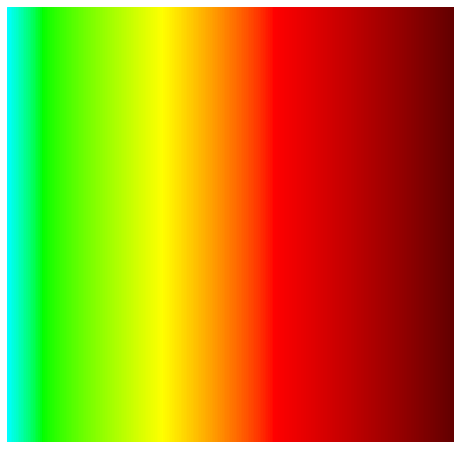

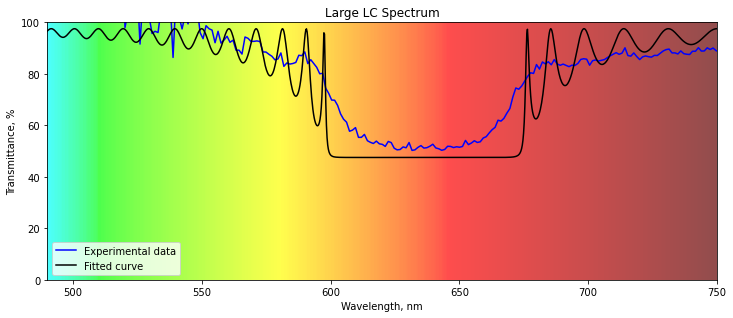

δ = 0.08249799583121308 
n = 1.6498428646768664 
L = 2.0013957703248844e-05


In [87]:
#Large
reformat_file('BIG5_1803151U1.TXT')
data = np.genfromtxt('BIG5_1803151U1TXTrfd.txt')
data = data[240:500] #Desired spectrum
xl = (490, 750)
yl = (0, 100)
#Background
fig, ax = plt.subplots(figsize=(8,8))
plt.xlim(xl)
plt.ylim(yl)
for i in range(*xl):
    rect = patches.Rectangle((i, 0), 1, yl[1], color=wavelength_to_rgb(i))
    ax.add_patch(rect)
ax.set_axis_off()
plt.savefig("background.png", bbox_inches='tight', pad_inches=0)
#Actual plot
fig, ax = plt.subplots(figsize=(12, 8))
img = mpimg.imread("background.png")
plt.xlim(xl)
plt.ylim(yl)
ax.imshow(img, zorder=1, alpha = 0.7, extent=[*xl, *yl])

ax.plot(data[:, 0], data[:, 4], color="blue", label="Experimental data")

lambda0 = data[data[:, 4].argmin(), 0]
popt, _ = curve_fit(T, data[:, 0], data[:, 4]/100, maxfev=20000, bounds=([0.045, 1.5, 1e-5], [0.12, 1.8, 3e-5]))
x = np.linspace(400, 800, 1600)

ax.plot(x, T1(x - 6, 0.115, 1.57, 7e-11)*100, color="black", label="Fitted curve")
ax.set_title("Large LC Spectrum")
ax.set_xlabel("Wavelength, nm")
ax.set_ylabel("Transmittance, %")
ax.legend()
plt.savefig("LargeLC.png")
plt.show()
print("\u03B4 =", popt[0], "\n"
      "n =", popt[1], "\n"
      "L =", popt[2])